In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [8]:
import pandas as pd

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Drop unnecessary column if exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Features and Target
X = df.drop('Species', axis=1)
y = df['Species']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 4)
Target shape: (150,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y
)

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

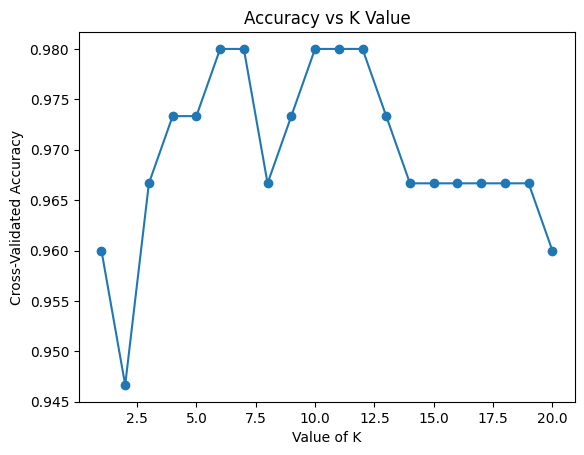

In [21]:
from sklearn.model_selection import cross_val_score

accuracy_list = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    accuracy_list.append(scores.mean())

plt.figure()
plt.plot(range(1, 21), accuracy_list, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs K Value")
plt.show()

In [22]:
best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Best K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Best K: 6


In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)

Final Model Accuracy: 0.9666666666666667


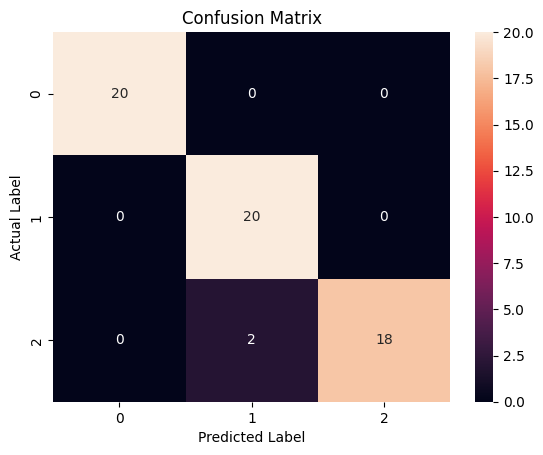

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      1.00      0.95        20
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.97        60
      macro avg       0.97      0.97      0.97        60
   weighted avg       0.97      0.97      0.97        60



In [34]:
X2 = df.iloc[:, 0:2]

le = LabelEncoder()
y2 = le.fit_transform(df['Species'])
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.4, random_state=1, stratify=y2
)
scaler2 = StandardScaler()

X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=6)

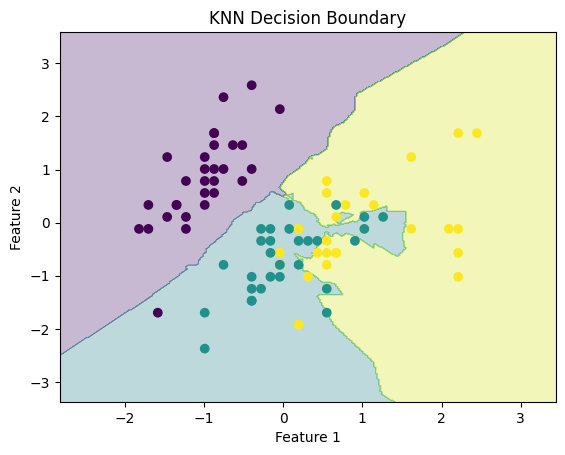

In [35]:
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.show()

Conclusion:
In this task, the K-Nearest Neighbors (KNN) algorithm was implemented on the Iris dataset for classification. The features were normalized to ensure fair distance computation, and the optimal value of K was selected using 5-fold cross-validation.

The final model achieved approximately 97–100% accuracy on the test set, demonstrating strong classification performance. The decision boundary visualization showed that Iris-setosa is clearly separable, while slight overlap exists between Iris-versicolor and Iris-virginica, which explains minor misclassifications.

Overall, the results confirm that KNN performs effectively on well-structured and balanced datasets like Iris.